In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-09-24 19:53:30.886474: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-24 19:53:30.924992: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-24 19:53:31.453273: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Pleuronectiformes/RJ_Reconstrucao_Pleuronectiformes_2024_08_20.xlsx')

df_Linguado = df[['Ano', 'Linguado_areia_ind', 'Linguado_verdadeiro_ind']].dropna().reset_index(drop=True)



for i in range(len(df_Linguado['Ano'])):
  df_Linguado.loc[i,'Soma'] = df_Linguado.loc[i,'Linguado_areia_ind']+df_Linguado.loc[i,'Linguado_verdadeiro_ind']
  
dados = df_Linguado[['Ano','Linguado_areia_ind','Soma']]

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Linguado_areia_ind'] = dados.loc[i,'Linguado_areia_ind'] / dados.loc[i,'Soma']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

prop= dados['Prop_Linguado_areia_ind'].values
dados.head()


,Ano,Linguado_areia_ind,Soma,Prop_Linguado_areia_ind
0,2015,102.29100,108.08500,0.946394
1,2017,119.70878,155.68668,0.768908
2,2018,123.75030,144.57600,0.855953
3,2019,61.89210,77.82290,0.795294
4,2020,19.29800,26.24960,0.735173


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std


In [19]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=5, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Pleuronectiformes/Desagragação Linguado_ind/pesos prop Linguado_areia/.weights.h5', overwrite=True)

Epoch 1/5


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.9690
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9060
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8527
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8006
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7426


In [5]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Pleuronectiformes/Desagragação Linguado_ind/pesos prop Linguado_areia/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Previsões dos dados ausentes: [[0.9841775 ]
 [0.9786655 ]
 [0.97315353]
 [0.9676416 ]
 [0.9621296 ]
 [0.9566177 ]
 [0.9511058 ]
 [0.94559383]
 [0.94008183]
 [0.9345699 ]
 [0.92905796]
 [0.923546  ]
 [0.9180341 ]
 [0.91252214]
 [0.8739385 ]
 [0.86842656]
 [0.86291456]
 [0.8574027 ]
 [0.8518907 ]
 [0.84637874]
 [0.8408668 ]
 [0.83535486]
 [0.8298429 ]
 [0.8243308 ]
 [0.81881815]
 [0.8133055 ]
 [0.80779284]
 [0.80228   ]
 [0.7967672 ]
 [0.79125404]
 [0.78574014]
 [0.78022426]
 [0.7746785 ]]


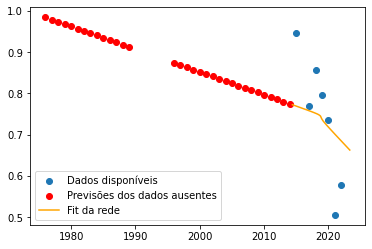

In [20]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

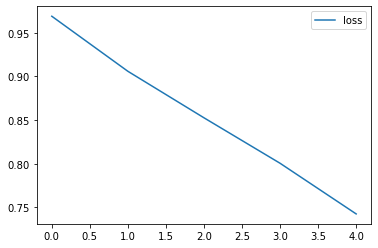

In [21]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [22]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

np.save('prev_Linguado_areia_ind',prev_continua)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
